In [237]:
import pandas as pd
import numpy as np

In [238]:
df = pd.read_csv("/Users/radhikaasmar/demo2/SafeBite_AI-Powered Allergen Detection in Food/Allergen_Status_of_Food_Products.csv")
df

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,Contains
2,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
3,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",17.48,4.7,Contains
4,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy,10.83,3.7,Contains
...,...,...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",5.07,2.9,Contains
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",11.95,4.4,Contains
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",12.67,3.4,Contains
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",15.83,2.4,Contains


In [239]:
df.shape

(399, 9)

In [240]:
df.dtypes

Food Product                   object
Main Ingredient                object
Sweetener                      object
Fat/Oil                        object
Seasoning                      object
Allergens                      object
Price ($)                     float64
Customer rating (Out of 5)    float64
Prediction                     object
dtype: object

In [241]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,Contains
2,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
3,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",17.48,4.7,Contains
4,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy,10.83,3.7,Contains


In [242]:
df.isnull().sum()

Food Product                    0
Main Ingredient                 0
Sweetener                     280
Fat/Oil                        58
Seasoning                      20
Allergens                     148
Price ($)                       0
Customer rating (Out of 5)      0
Prediction                      1
dtype: int64

In [243]:
df.isnull().sum().sum()

507

In [244]:
df.notnull().sum()

Food Product                  399
Main Ingredient               399
Sweetener                     119
Fat/Oil                       341
Seasoning                     379
Allergens                     251
Price ($)                     399
Customer rating (Out of 5)    399
Prediction                    398
dtype: int64

In [245]:
df.notnull().sum().sum()

3084

In [246]:
df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,Contains
2,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",19.65,4.1,Contains
3,Chicken Noodle Soup,Chicken broth,NaN,NaN,Salt,"Chicken, Wheat, Celery",17.48,4.7,Contains
4,Cheddar Cheese,Cheese,NaN,NaN,Salt,Dairy,10.83,3.7,Contains


In [247]:
df.columns

Index(['Food Product', 'Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning',
       'Allergens', 'Price ($)', 'Customer rating (Out of 5)', 'Prediction'],
      dtype='object')

In [248]:
gr1 = df.groupby(by = 'Prediction')
gr1.describe()


Price ($)                                                  \
                     count       mean       std   min    25%    50%    75%   
Prediction                                                                   
Contains             255.0  12.491216  4.271488  5.07  8.755  12.65  15.99   
Does not contain     143.0  12.230629  4.558298  5.21  8.035  11.99  16.38   

                        Customer rating (Out of 5)                           \
                    max                      count      mean       std  min   
Prediction                                                                    
Contains          19.93                      255.0  3.072941  1.186013  1.0   
Does not contain  19.86                      143.0  2.836364  1.131094  1.0   

                                      
                  25%  50%  75%  max  
Prediction                            
Contains          2.0  3.2  4.1  5.0  
Does not contain  1.9  2.8  3.8  4.9

In [249]:
df = df.infer_objects(copy=False).replace({'Contains': 1, 'Does not contain': 0})

/var/folders/4_/7fhgy55n52j_k9m76p98r3vw0000gn/T/ipykernel_21428/415042073.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# Task - Using Matplotlib and Seaborn for Data Visualisation

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

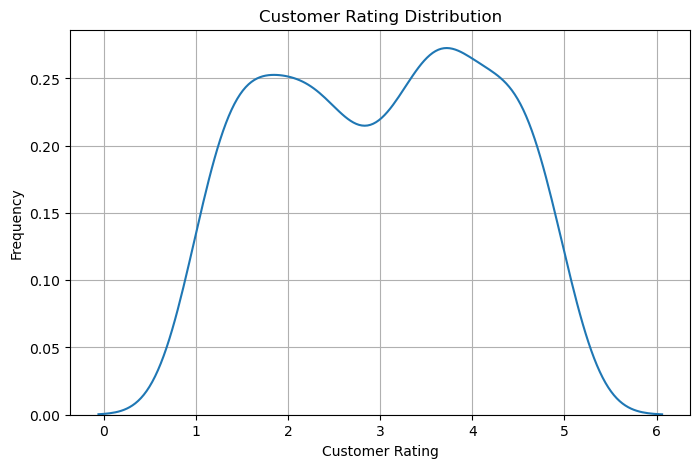

In [251]:
# 1. Customer Rating Distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Customer rating (Out of 5)'])
plt.title('Customer Rating Distribution')
plt.xlabel('Customer Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



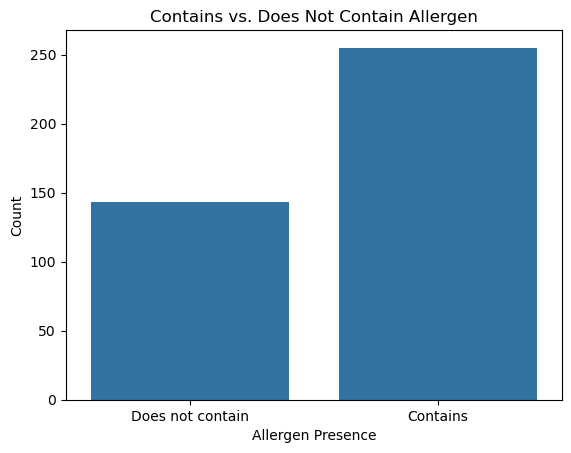

In [252]:
# 2. Count of Products by Allergen Prediction
sns.countplot(data=df, x='Prediction')
plt.xticks([0, 1], ['Does not contain', 'Contains'])
plt.xlabel("Allergen Presence")
plt.ylabel("Count")
plt.title("Contains vs. Does Not Contain Allergen")
plt.show()

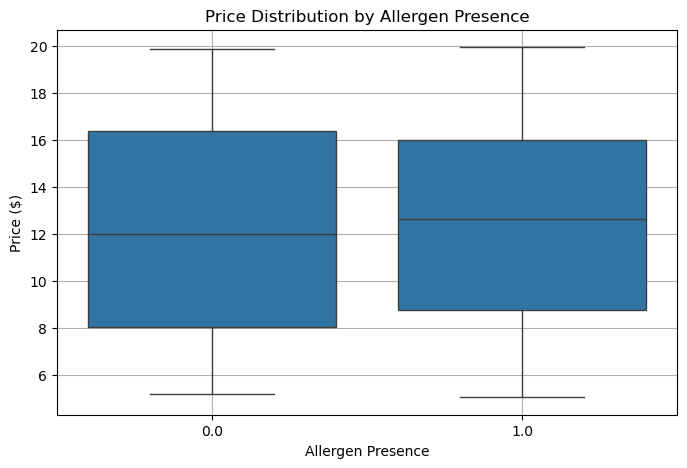

In [253]:
# 3. Price Distribution by Allergen Presence
plt.figure(figsize=(8, 5))
sns.boxplot(x='Prediction', y='Price ($)', data=df)
plt.title('Price Distribution by Allergen Presence')
plt.xlabel('Allergen Presence')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


In [254]:
# 4. Top 10 Most Common Main Ingredients
top_main_ingredients = df['Main Ingredient'].value_counts().head(10)
print("Top 10 Most Common Main Ingredients:")
print(top_main_ingredients)

Top 10 Most Common Main Ingredients:
Main Ingredient
Chicken             61
Flour               16
Beef                15
Pasta               14
Apples              12
Tomatoes            12
Spinach             11
Shrimp              10
Mixed vegetables     8
Pizza dough          7
Name: count, dtype: int64


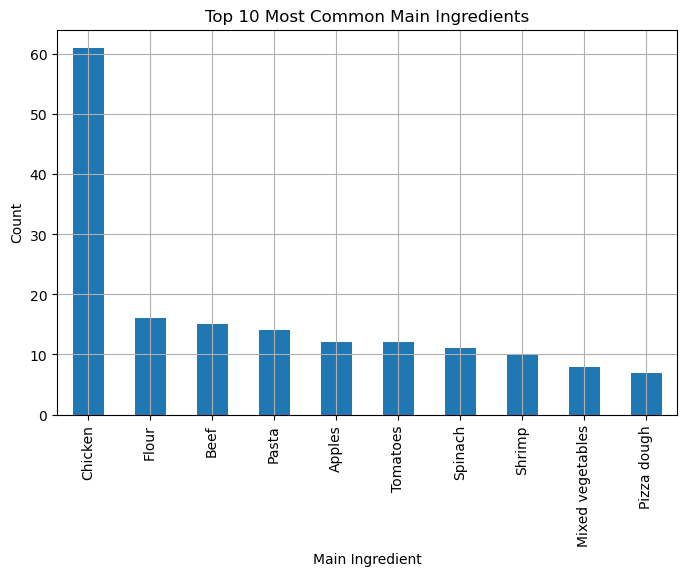

In [255]:
plt.figure(figsize=(8, 5))
top_main_ingredients.plot(kind='bar')
plt.title('Top 10 Most Common Main Ingredients')
plt.xlabel('Main Ingredient')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [256]:
# 5. Top 10 Most Frequent Allergens
# Split allergens and count occurrences
allergen_counts = df['Allergens'].str.split(', ', expand=True).stack().value_counts()
top_allergens = allergen_counts.head(10)
print("Top 10 Most Frequent Allergens:")
print(top_allergens)

Top 10 Most Frequent Allergens:
Dairy        190
Wheat         96
Fish          20
Soybeans      17
Shellfish     16
Eggs          13
Milk           6
Nuts           5
Peanuts        5
Pine nuts      3
Name: count, dtype: int64


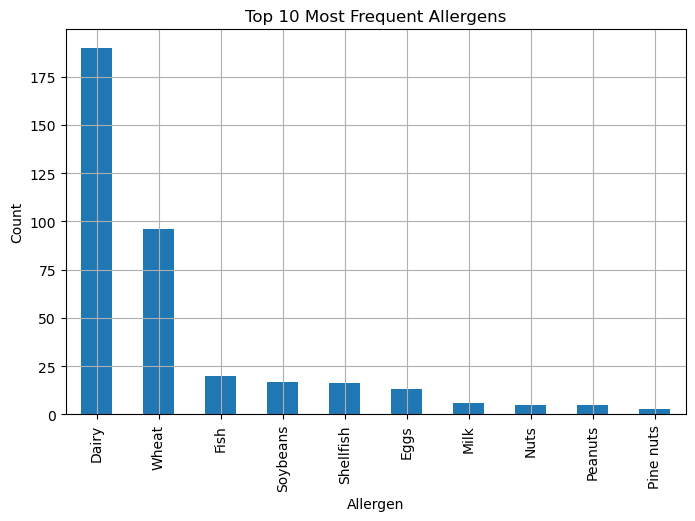

In [257]:
plt.figure(figsize=(8, 5))
top_allergens.plot(kind='bar')
plt.title('Top 10 Most Frequent Allergens')
plt.xlabel('Allergen')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Task using Plotly for Data Visualisation

In [258]:
import plotly.express as px
import plotly.graph_objects as go

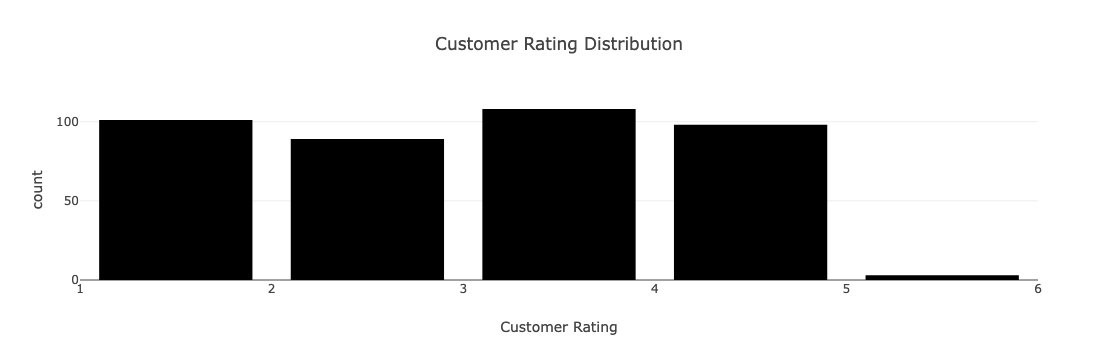

In [259]:
# 1. Customer Rating Distribution (Interactive histogram)
fig1 = px.histogram(df, x='Customer rating (Out of 5)', nbins=5, title="Customer Rating Distribution",
                    labels={'Customer rating (Out of 5)': 'Customer Rating'})
fig1.update_layout(bargap=0.2)
fig1.show()

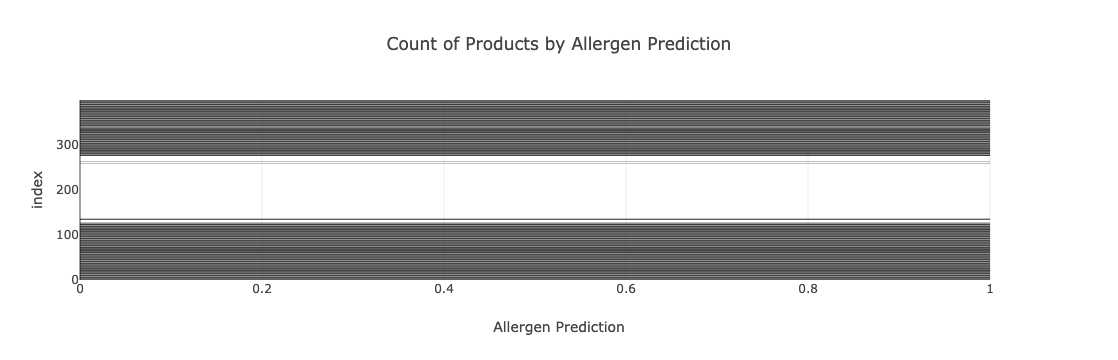

In [260]:
# 2. Count of Products by Allergen Prediction (Interactive bar chart)
fig2 = px.bar(df, x='Prediction', title="Count of Products by Allergen Prediction", 
              labels={'Prediction': 'Allergen Prediction'}, text_auto=True)
fig2.show()

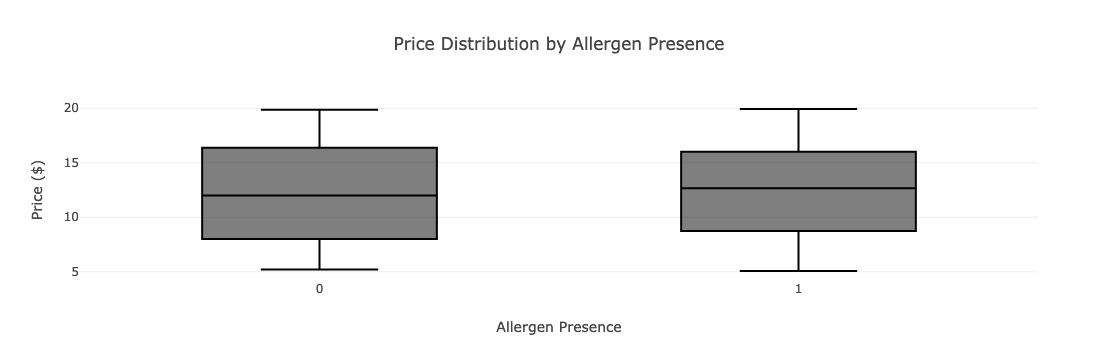

In [261]:
# 3. Price Distribution by Allergen Presence (Interactive box plot)
fig3 = px.box(df, x='Prediction', y='Price ($)', title="Price Distribution by Allergen Presence",
              labels={'Prediction': 'Allergen Presence', 'Price ($)': 'Price ($)'})
fig3.show()

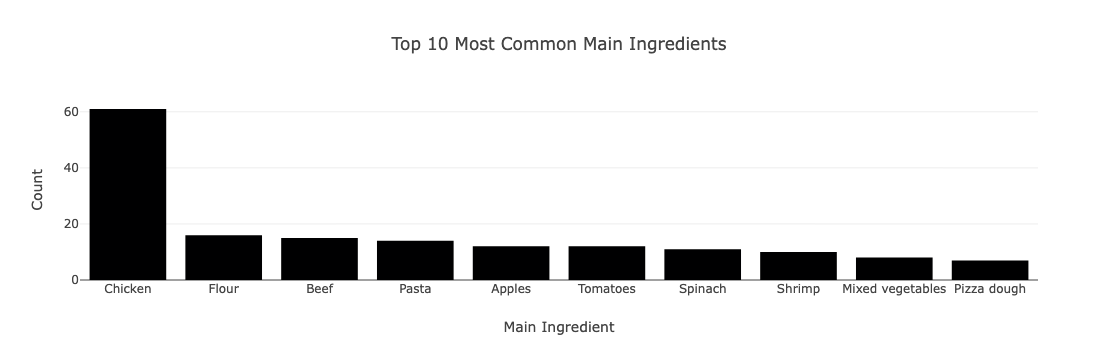

In [262]:
# 4. Top 10 Most Common Main Ingredients (Interactive bar chart)
top_main_ingredients = df['Main Ingredient'].value_counts().head(10)
fig4 = px.bar(top_main_ingredients, x=top_main_ingredients.index, y=top_main_ingredients.values,
              title="Top 10 Most Common Main Ingredients", labels={'x': 'Main Ingredient', 'y': 'Count'})
fig4.show()

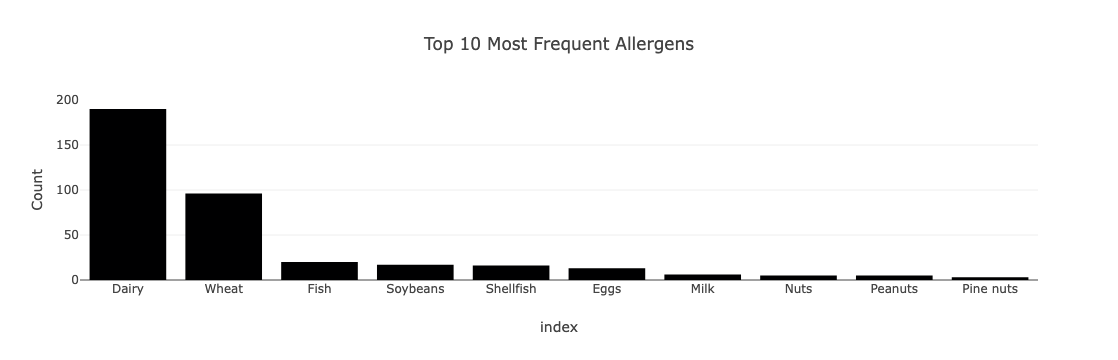

In [263]:
# 5. Top 10 Most Frequent Allergens (Interactive bar chart)
allergen_counts = df['Allergens'].str.split(', ', expand=True).stack().value_counts().head(10)
fig5 = px.bar(allergen_counts, x=allergen_counts.index, y=allergen_counts.values,
              title="Top 10 Most Frequent Allergens", labels={'x': 'Allergen', 'y': 'Count'})
fig5.show()

# Handling Missing Values

In [264]:
df.isnull().sum()

Food Product                    0
Main Ingredient                 0
Sweetener                     280
Fat/Oil                        58
Seasoning                      20
Allergens                     148
Price ($)                       0
Customer rating (Out of 5)      0
Prediction                      1
dtype: int64

In [265]:
# Impute missing values
df['Sweetener'] = df['Sweetener'].fillna('None')        # Fill missing Sweetener with 'None'
df['Fat/Oil'] = df['Fat/Oil'].fillna('None')            # Fill missing Fat/Oil with 'None'
df['Seasoning'] = df['Seasoning'].fillna('None')        # Fill missing Seasoning with 'None'
df['Allergens'] = df['Allergens'].fillna('None')        # Fill missing Allergens with 'None'
df['Prediction'] = df['Prediction'].fillna(df['Prediction'].mode()[0])  # Fill missing Prediction with mode

In [266]:
df.isnull().sum()

Food Product                  0
Main Ingredient               0
Sweetener                     0
Fat/Oil                       0
Seasoning                     0
Allergens                     0
Price ($)                     0
Customer rating (Out of 5)    0
Prediction                    0
dtype: int64

# Task - Duplicates 

In [267]:
#1. Identify Duplicate Rows in the Entire
duplicates = df.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
394    False
395    False
396    False
397    False
398    False
Length: 399, dtype: bool

In [268]:
#2. Count the Number of Duplicates
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [269]:
#3. Identify Duplicates Based on Specific Columns
duplicates_specific = df.duplicated(subset=['Food Product', 'Main Ingredient'])
duplicates_specific

0      False
1       True
2      False
3       True
4      False
       ...  
394     True
395    False
396     True
397     True
398    False
Length: 399, dtype: bool

In [270]:
#4. Count Duplicates in Specific Columns
num_duplicates_specific = df.duplicated(subset=['Food Product', 'Main Ingredient']).sum()
print(f"Number of duplicate rows based on specific columns: {num_duplicates_specific}")

Number of duplicate rows based on specific columns: 123


In [271]:
#5. Show Duplicate Rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Food Product, Main Ingredient, Sweetener, Fat/Oil, Seasoning, Allergens, Price ($), Customer rating (Out of 5), Prediction]
Index: []


In [272]:
#6. Drop Duplicate Rows in the Entire Dataset
df = df.drop_duplicates()
df

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,1.0
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,1.0
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,1.0
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,1.0
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,1.0
...,...,...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",5.07,2.9,1.0
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",11.95,4.4,1.0
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",12.67,3.4,1.0
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",15.83,2.4,1.0


In [273]:
#7. Drop Duplicate Rows Based on Specific Columns
# Drop duplicates based on specific columns (e.g., 'Food Product' and 'Main Ingredient')
df_no_duplicates_specific = df.drop_duplicates(subset=['Food Product', 'Main Ingredient'])
df_no_duplicates_specific

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,1.0
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,1.0
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,1.0
5,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,9.92,2.3,1.0
6,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,6.14,3.2,1.0
...,...,...,...,...,...,...,...,...,...
391,Chocolate Cake,Flour,Sugar,Butter,Cocoa powder,"Wheat, Dairy, Cocoa",19.26,2.9,1.0
392,Chocolate Chip Pancakes,Flour,Sugar,Butter,Chocolate chips,"Wheat, Dairy, Cocoa",6.34,1.7,1.0
393,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",14.18,3.8,1.0
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",11.95,4.4,1.0


# Task 

In [274]:
df.isnull().sum().sum()

0

In [275]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction


In [276]:
df

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,1.0
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,1.0
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,1.0
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,1.0
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,1.0
...,...,...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",5.07,2.9,1.0
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",11.95,4.4,1.0
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",12.67,3.4,1.0
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",15.83,2.4,1.0


In [277]:
from scipy import stats

# Remove outliers using z-score (threshold = 3 standard deviations)
df = df[(np.abs(stats.zscore(df['Price ($)'])) < 3)]
df = df[(np.abs(stats.zscore(df['Customer rating (Out of 5)'])) < 3)]

In [278]:
df

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",10.15,3.1,1.0
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",6.17,4.5,1.0
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",19.65,4.1,1.0
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",17.48,4.7,1.0
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,10.83,3.7,1.0
...,...,...,...,...,...,...,...,...,...
394,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",5.07,2.9,1.0
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",11.95,4.4,1.0
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",12.67,3.4,1.0
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",15.83,2.4,1.0


In [279]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Prediction' column
label_encoder = LabelEncoder()
df['Prediction'] = label_encoder.fit_transform(df['Prediction'])

# Frequency encode the remaining categorical columns
for col in ['Main Ingredient', 'Sweetener', 'Fat/Oil', 'Seasoning', 'Allergens']:
    freq_encoding = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_encoding)

df

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,2,92,85,11,2,10.15,3.1,1
1,Almond Cookies,2,92,85,11,2,6.17,4.5,1
2,Chicken Noodle Soup,2,280,58,11,2,19.65,4.1,1
3,Chicken Noodle Soup,2,280,58,11,2,17.48,4.7,1
4,Cheddar Cheese,3,280,58,11,83,10.83,3.7,1
...,...,...,...,...,...,...,...,...,...
394,Lemon Bars,3,92,85,2,2,5.07,2.9,1
395,Pecan Pie,1,92,85,1,3,11.95,4.4,1
396,Zucchini Bread,4,92,85,2,3,12.67,3.4,1
397,Banana Bread,4,92,85,2,3,15.83,2.4,1


In [280]:
df.dtypes

Food Product                   object
Main Ingredient                 int64
Sweetener                       int64
Fat/Oil                         int64
Seasoning                       int64
Allergens                       int64
Price ($)                     float64
Customer rating (Out of 5)    float64
Prediction                      int64
dtype: object

# Task

In [281]:
df

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
0,Almond Cookies,2,92,85,11,2,10.15,3.1,1
1,Almond Cookies,2,92,85,11,2,6.17,4.5,1
2,Chicken Noodle Soup,2,280,58,11,2,19.65,4.1,1
3,Chicken Noodle Soup,2,280,58,11,2,17.48,4.7,1
4,Cheddar Cheese,3,280,58,11,83,10.83,3.7,1
...,...,...,...,...,...,...,...,...,...
394,Lemon Bars,3,92,85,2,2,5.07,2.9,1
395,Pecan Pie,1,92,85,1,3,11.95,4.4,1
396,Zucchini Bread,4,92,85,2,3,12.67,3.4,1
397,Banana Bread,4,92,85,2,3,15.83,2.4,1


In [282]:
df.describe()  # Gives summary statistics for numerical columns

,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Price ($),Customer rating (Out of 5),Prediction
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,14.689223,218.177945,54.619048,4.528822,86.192982,12.402356,2.991228,0.641604
std,20.145043,96.932116,33.666413,4.878272,55.477918,4.368315,1.171049,0.480131
min,1.000000,1.000000,1.000000,1.000000,1.000000,5.070000,1.000000,0.000000
25%,3.000000,92.000000,27.000000,2.000000,72.000000,8.650000,1.900000,0.000000
50%,6.000000,280.000000,58.000000,3.000000,83.000000,12.470000,3.100000,1.000000
75%,14.000000,280.000000,85.000000,5.000000,148.000000,16.105000,4.000000,1.000000
max,61.000000,280.000000,90.000000,20.000000,148.000000,19.930000,5.000000,1.000000


In [283]:
df.dtypes

Food Product                   object
Main Ingredient                 int64
Sweetener                       int64
Fat/Oil                         int64
Seasoning                       int64
Allergens                       int64
Price ($)                     float64
Customer rating (Out of 5)    float64
Prediction                      int64
dtype: object

In [284]:
from sklearn.model_selection import train_test_split

### Step 1: Split the dataset into X (features) and y (target variable)

In [285]:
X = df.drop(columns=['Prediction'])  # Drop target columns to create features
y = df[['Prediction']]  # Target variable

### Step 2: Print the shape of both X and y

In [286]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (399, 8)
Shape of y: (399, 1)


### Step 3: Perform a train-test split in an 80:20 ratio

In [287]:
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Perform another train-test split in a 70:30 ratio

In [288]:
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 5: Print the shape of the 80:20 split data

In [289]:
print("80:20 Split - X_train shape:", X_train_80.shape)
print("80:20 Split - X_test shape:", X_test_80.shape)
print("80:20 Split - y_train shape:", y_train_80.shape)
print("80:20 Split - y_test shape:", y_test_80.shape)

80:20 Split - X_train shape: (319, 8)
80:20 Split - X_test shape: (80, 8)
80:20 Split - y_train shape: (319, 1)
80:20 Split - y_test shape: (80, 1)


### Step 6: Print the shape of the 70:30 split data

In [290]:
print("70:30 Split - X_train shape:", X_train_70.shape)
print("70:30 Split - X_test shape:", X_test_70.shape)
print("70:30 Split - y_train shape:", y_train_70.shape)
print("70:30 Split - y_test shape:", y_test_70.shape)

70:30 Split - X_train shape: (279, 8)
70:30 Split - X_test shape: (120, 8)
70:30 Split - y_train shape: (279, 1)
70:30 Split - y_test shape: (120, 1)


# Task: Train a Base Model using multiple classification algorithms 70:30 with hyperparameter tuning


In [291]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming the dataset has already been encoded
# df = pd.read_csv('your_encoded_dataset.csv')  # Load your dataset here
# Step 1: Apply label encoding on the target column
label_encoder = LabelEncoder()
df['Prediction'] = label_encoder.fit_transform(df['Prediction'])

# Step 2: Apply frequency encoding on categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    freq_encoding = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_encoding)

# Step 1: Split the dataset into X (features) and y (target variable)
X = df.drop(columns=['Prediction'])  # Features
y = df['Prediction']  # Target variable (1D)

# Step 2: Perform a train-test split in an 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Define models and hyperparameters for tuning
models_with_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ['liblinear', 'lbfgs']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [5, 10, 15],
            "criterion": ['gini', 'entropy']
        }
    },
    "Support Vector Machine": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'rbf', 'poly']
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ['uniform', 'distance']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [5, 10, 15],
            "criterion": ['gini', 'entropy']
        }
    }
}

# Step 4: Perform GridSearchCV for each model
results = []

for name, model_info in models_with_params.items():
    model = model_info["model"]
    param_grid = model_info["params"]
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator and its accuracy
    best_model = grid_search.best_estimator_
    train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
    
    # Append results
    results.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Step 5: Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


                    Model                                        Best Params  \
0     Logistic Regression                     {'C': 0.01, 'solver': 'lbfgs'}   
1           Random Forest  {'criterion': 'gini', 'max_depth': 5, 'n_estim...   
2  Support Vector Machine                          {'C': 1, 'kernel': 'rbf'}   
3     K-Nearest Neighbors           {'n_neighbors': 7, 'weights': 'uniform'}   
4           Decision Tree              {'criterion': 'gini', 'max_depth': 5}   

   Train Accuracy  Test Accuracy  
0        0.989247       0.983333  
1        0.992832       0.983333  
2        0.985663       0.991667  
3        0.985663       0.958333  
4        0.996416       0.975000  


In [292]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Apply label encoding on the target column
label_encoder = LabelEncoder()
df['Prediction'] = label_encoder.fit_transform(df['Prediction'])

# Step 2: Apply frequency encoding on categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    freq_encoding = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_encoding)

# Step 3: Split the dataset into X (features) and y (target variable)
X = df.drop(columns=['Prediction'])  # Features
y = df['Prediction']  # Target variable (1D)

# Step 4: Perform a train-test split in an 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 5: Initialize multiple classification models
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "scale": True
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "scale": False
    },
    "Support Vector Machine": {
        "model": SVC(),
        "scale": True
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "scale": True
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "scale": False
    }
}

# Step 6: Train and evaluate each model
results = []

for name, info in models.items():
    model = info["model"]
    scale = info["scale"]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on both train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Step 7: Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


                    Model  Train Accuracy  Test Accuracy
0     Logistic Regression        0.992832       0.983333
1           Random Forest        1.000000       0.983333
2  Support Vector Machine        0.985663       0.991667
3     K-Nearest Neighbors        0.985663       0.958333
4           Decision Tree        1.000000       0.975000


# Using leaveoneout encoding

In [293]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder

# Step 1: Apply label encoding on the target column
label_encoder = LabelEncoder()
df['Prediction'] = label_encoder.fit_transform(df['Prediction'])

# Step 2: Apply Leave-One-Out encoding on categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
loo_encoder = LeaveOneOutEncoder(cols=categorical_columns)

# Split the dataset into X (features) and y (target variable) before encoding
X = df.drop(columns=['Prediction'])  # Features
y = df['Prediction']  # Target variable (1D)

# Apply LOO encoding only on training data to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = loo_encoder.fit_transform(X_train, y_train)
X_test = loo_encoder.transform(X_test)

# Step 3: Initialize multiple classification models
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "scale": True
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "scale": False
    },
    "Support Vector Machine": {
        "model": SVC(),
        "scale": True
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "scale": True
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "scale": False
    }
}

# Step 4: Train and evaluate each model
results = []

for name, info in models.items():
    model = info["model"]
    scale = info["scale"]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on both train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Step 5: Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


                    Model  Train Accuracy  Test Accuracy
0     Logistic Regression        0.992832       0.983333
1           Random Forest        1.000000       0.983333
2  Support Vector Machine        0.985663       0.991667
3     K-Nearest Neighbors        0.985663       0.958333
4           Decision Tree        1.000000       0.975000


In [294]:
import joblib


# Saving the dataset using joblib

In [295]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
import joblib

# Step 1: Apply label encoding on the target column
label_encoder = LabelEncoder()
df['Prediction'] = label_encoder.fit_transform(df['Prediction'])

# Step 2: Apply Leave-One-Out encoding on categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
loo_encoder = LeaveOneOutEncoder(cols=categorical_columns)

# Split the dataset into X (features) and y (target variable) before encoding
X = df.drop(columns=['Prediction'])
y = df['Prediction']

# Apply LOO encoding only on training data to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = loo_encoder.fit_transform(X_train, y_train)
X_test = loo_encoder.transform(X_test)

# Step 3: Initialize multiple classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Step 4: Train, save, and evaluate each model
results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Save the model using joblib
    joblib.dump(model, f'{name.replace(" ", "_").lower()}_model.pkl')
    
    # Predict on both train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Step 5: Display the results
results_df = pd.DataFrame(results)
print(results_df)

# Step 6: Load and use a saved model (example: Logistic Regression)
loaded_model = joblib.load('logistic_regression_model.pkl')
y_loaded_pred = loaded_model.predict(X_test)


                    Model  Train Accuracy  Test Accuracy
0     Logistic Regression        0.992832       0.983333
1           Random Forest        1.000000       0.983333
2  Support Vector Machine        0.985663       0.991667
3     K-Nearest Neighbors        0.985663       0.958333
4           Decision Tree        1.000000       0.975000
